In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [82]:
df = pd.read_excel('data.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STT                      585 non-null    int64  
 1   Tổng các ngày            585 non-null    object 
 2   Thời gian thực tế        556 non-null    float64
 3   Số lượng đạt             556 non-null    float64
 4   Số lượng lỗi             554 non-null    float64
 5   Thời gian bình quân (s)  453 non-null    object 
 6   Năng suất ngày (sp)      435 non-null    float64
 7   Năng suất đạt  (%)       425 non-null    float64
 8   Bậc thợ                  585 non-null    int64  
 9   % lỗi                    556 non-null    float64
 10  Hệ số                    585 non-null    float64
 11  Thời gian chuẩn          584 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 55.0+ KB


In [83]:
df.head()

,STT,Tổng các ngày,Thời gian thực tế,Số lượng đạt,Số lượng lỗi,Thời gian bình quân (s),Năng suất ngày (sp),Năng suất đạt (%),Bậc thợ,% lỗi,Hệ số,Thời gian chuẩn
0,1,26/3/2024,48.0,20.0,0.0,162.825,20.0,0.294795,2,0.000000,0.9,44.444444
1,2,27/3/2024,50.0,20.0,0.0,175.44,10.0,0.569995,2,0.000000,0.9,46.296296
2,3,28/3/2024,84.0,3.0,0.0,162.825,20.0,0.077384,2,0.000000,0.9,77.777778
3,4,29/3/2024,18.0,6.0,1.0,162.825,20.0,0.033164,2,0.166667,0.9,16.666667
4,5,30/3/2024,102.0,9.0,0.0,120.45,22.0,0.346428,2,0.000000,0.9,94.444444


In [84]:

df.columns = df.columns.str.strip()
df.drop(columns=['Tổng các ngày'], inplace=True, errors='ignore')
# Tạo biến mục tiêu (target): Nếu có lỗi (Số lượng lỗi > 0) thì gán là 1, ngược lại là 0
df['Lỗi'] = df['Số lượng lỗi'].apply(lambda x: 1 if x > 0 else 0)
# Chuyển đổi các cột phần trăm thành số thực (loại bỏ dấu % và chia cho 100)
df['Năng suất đạt  (%)'] = df['Năng suất đạt  (%)'] / 100
df['% lỗi'] = df['% lỗi'] / 100

# Thay thế các giá trị trống (nếu có) thành NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Loại bỏ các hàng chứa NaN
df.dropna(inplace=True)
df = df.drop_duplicates()
# Hiển thị kết quả
print(df)
df.to_csv('data_cleand.csv', index=False, encoding='utf-8-sig')

     STT  Thời gian thực tế  Số lượng đạt  Số lượng lỗi  \
0      1              48.00          20.0           0.0   
1      2              50.00          20.0           0.0   
2      3              84.00           3.0           0.0   
3      4              18.00           6.0           1.0   
4      5             102.00           9.0           0.0   
..   ...                ...           ...           ...   
580  581              36.00          13.0           1.0   
581  582             138.00          13.0           0.0   
582  583              84.00           2.0           0.0   
583  584              54.00          10.0           0.0   
584  585             378.67          20.0          19.0   

    Thời gian bình quân (s)  Năng suất ngày (sp)  Năng suất đạt  (%)  Bậc thợ  \
0                   162.825                 20.0            0.002948        2   
1                    175.44                 10.0            0.005700        2   
2                   162.825                 20.0

In [85]:
df.head()

,STT,Thời gian thực tế,Số lượng đạt,Số lượng lỗi,Thời gian bình quân (s),Năng suất ngày (sp),Năng suất đạt (%),Bậc thợ,% lỗi,Hệ số,Thời gian chuẩn,Lỗi
0,1,48.0,20.0,0.0,162.825,20.0,0.002948,2,0.000000,0.9,44.444444,0
1,2,50.0,20.0,0.0,175.44,10.0,0.005700,2,0.000000,0.9,46.296296,0
2,3,84.0,3.0,0.0,162.825,20.0,0.000774,2,0.000000,0.9,77.777778,0
3,4,18.0,6.0,1.0,162.825,20.0,0.000332,2,0.001667,0.9,16.666667,1
4,5,102.0,9.0,0.0,120.45,22.0,0.003464,2,0.000000,0.9,94.444444,0


Lỗi
0    368
1     54
Name: count, dtype: int64


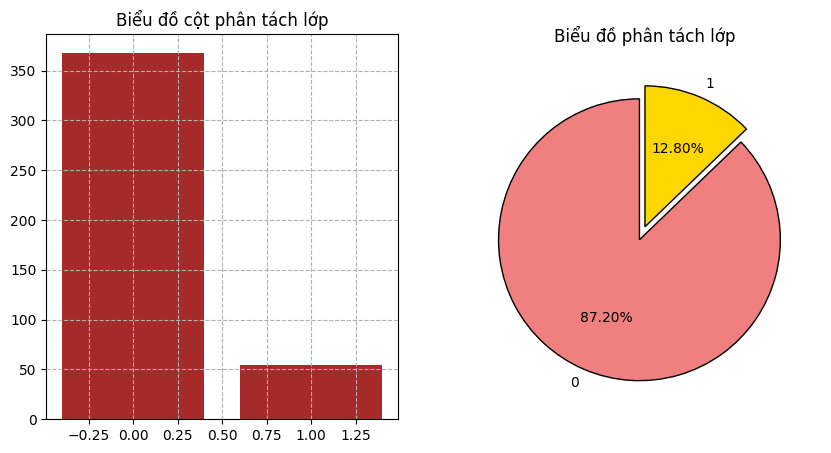

In [86]:
# Kiểm tra cân bằng dữ liệu
check = df['Lỗi'].value_counts()
print(check)

# Trực quan hóa dữ liệu
plt.figure(figsize=(10, 5))

# Biểu đồ cột
plt.subplot(1, 2, 1)
plt.bar(check.index, check.values, color='brown')
plt.grid(ls='--')
plt.title('Biểu đồ cột phân tách lớp')

# Biểu đồ tròn
plt.subplot(1, 2, 2)
colors = ['lightcoral', 'gold', 'skyblue', 'lightgreen']  # Màu sắc tùy chỉnh
explode = [0.1 if value == max(check.values) else 0 for value in check.values]  # Làm nổi bật phần lớn nhất

# Vẽ biểu đồ tròn và lưu lại wedges (phần biểu đồ)
wedges, texts, autotexts = plt.pie(
    check.values,
    labels=check.index,
    autopct='%.2f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Biểu đồ phân tách lớp')
plt.show()

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [88]:
# Tách các cột làm biến độc lập (đầu vào của mô hình X)
X = df.loc[:, ['Năng suất ngày (sp)', 'Thời gian bình quân (s)', 'Thời gian chuẩn', 'Số lượng đạt', 'Bậc thợ']].values
X_scaled = scaler.fit_transform(X)
# Hiển thị X
print(X)


[[20.0 162.82500000000002 44.44444444444444 20.0 2]
 [10.0 175.44 46.29629629629629 20.0 2]
 [20.0 162.82500000000002 77.77777777777777 3.0 2]
 ...
 [10.0 173.7 70.0 2.0 3]
 [10.0 173.7 45.0 10.0 3]
 [20.0 450.56 274.3985507246377 20.0 4]]


In [89]:
y = df.loc[:,'Lỗi'].values
y

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [90]:
#Thực hiện tách theo tỷ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, shuffle=True) 
print('Tổng số mẫu dữ liệu   :', len(y))
print('Số mẫu trong tập Train:',len(y_train))
print('Số mẫu trong tập Test :',len(y_test))

Tổng số mẫu dữ liệu   : 422
Số mẫu trong tập Train: 337
Số mẫu trong tập Test : 85


In [91]:
from sklearn.linear_model import LogisticRegression
# Khởi tạo và huấn luyện mô hình
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [92]:
    #Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test: Model.predict(X_test)
    y_pred = model.predict(X_test)
    #So sánh kết quả dự đoán với kết quả thật với 20 hành bn đầu tiên:
    print('Giá trị thật         :', y_test[:20])
    print('Mô hình dự đoán.     :', y_pred[:20])

Giá trị thật         : [0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0]
Mô hình dự đoán.     : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [93]:
#1. Đếm tổng số mẫu dự đoán đúng trên tập Test: normalize=False
acc_test = accuracy_score(y_test,y_pred, normalize=False)

print('Tổng số mẫu trong tập test:', len(y_test))
print('Số mẫu dự đoán đúng       :', acc_test)
print('Số mẫu dự đoán sai        :', len(y_test) - acc_test)

Tổng số mẫu trong tập test: 85
Số mẫu dự đoán đúng       : 70.0
Số mẫu dự đoán sai        : 15.0


In [94]:
#Độ chính xác của Model trên tập Huấn luyện: Model.score(X_train,y_train)
acc1_train =model.score(X_train,y_train)
print('Độ chính xác trên tập train:',acc1_train)
print('độ chính xác trên tập train(%)', round(acc1_train*100,2),'(%)')

Độ chính xác trên tập train: 0.8902077151335311
độ chính xác trên tập train(%) 89.02 (%)


Ma trận nhầm lẫn:
[[69  1]
 [14  1]]


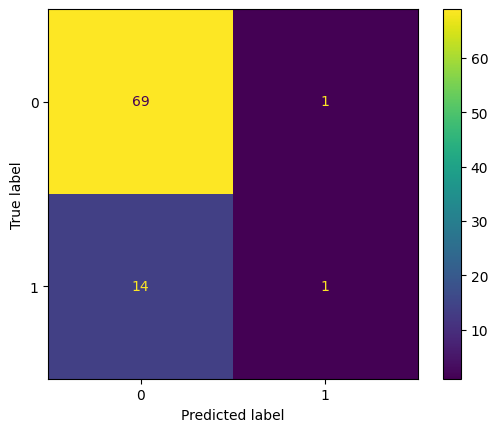

In [95]:
#3.Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Tính toán ma trận
cnf_matrix_partient = confusion_matrix(y_test,y_pred)

#Hiển thị ma trân:
print('Ma trận nhầm lẫn:')
print(cnf_matrix_partient)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [96]:
worker_grade = float(input("Nhập Bậc thợ: "))
standard_time = float(input("Nhập Thời gian chuẩn (s): "))  
avg_time = float(input("Nhập Thời gian bình quân (s): ")) 
num_achieved = int(input("Nhập Số lượng đạt: "))  
sp_day = float(input("Nhập Năng suất ngày (sp): "))  

print(f"\nThông tin nhập:")
print(f"Bậc thợ: {worker_grade}")
print(f"Thời gian chuẩn: {standard_time}s")
print(f"Thời gian bình quân: {avg_time}s")
print(f"Số lượng đạt: {num_achieved}")
print(f"Năng suất ngày: {sp_day}")


input_data = np.array([[worker_grade, standard_time, avg_time, num_achieved, sp_day]])
pred_error = model.predict(input_data)

print(f"\nKết quả: {'Sản phẩm có lỗi' if pred_error == 1 else 'Sản phẩm không có lỗi'}")


Thông tin nhập:
Bậc thợ: 4.0
Thời gian chuẩn: 48.0s
Thời gian bình quân: 165.0s
Số lượng đạt: 20
Năng suất ngày: 20.0

Kết quả: Sản phẩm không có lỗi
